### Decision Tree  
决策树是一种广泛应用于分类与回归任务的机器学习模型，通过树状结构对数据进行递归划分，核心算法包括ID3（基于信息增益构建多叉分类树）、C4.5（改进为信息增益比并支持连续特征与缺失值处理）和CART（采用基尼指数/均方误差生成二叉树，支持分类与回归）

#### 1. ID3算法  
- 核心思想是基于信息增益，选择一个特征对数据集进行分裂。通过最大化信息增益来选择最佳特征，最终生成一棵多叉树，直到达到停止条件
- 信息增益的概念源于信息论，表示某个特征对分类的贡献度。ID3假设，选择信息增益最大的特征可以使得分裂后的数据集更加纯净  

##### 1.1 计算数据集的熵  
熵是衡量数据集纯度的指标，公式如下：  

$$H(X) = - \sum_{i=1}^{m} p(x_i) \log_2 p(x_i)$$


熵的取值范围是[0,$\log_2 m$]
- 当所有样本属于同一类别时，熵为0  
- 类别分布均匀时熵最大，$H(D)=\log_2 m$

##### 1.2 计算信息增益  
信息增益衡量某个特征对分类的贡献度  
$$Gain(D,A)=H(D)-H(D|A)$$

信息增益表示分裂前后数据熵的减少量，信息增益越大，说明该特征对分类的贡献越大

##### 1.3 选择最优特征  
从所有候选特征中，选择 信息增益最大 的特征作为当前节点的分裂特征

##### 1.4 递归分裂
对每个子节点，递归调用上述步骤（2.1 到 2.3），直到满足以下停止条件：
1. 同类样本：如果当前节点包含的所有样本属于同一类别，则直接将该节点标记为叶节点。
2. 无更多特征：如果没有更多特征可供分裂，则当前节点标记为叶节点，类别由样本中出现频率最高的类别决定。
3. 空样本集：如果当前样本集为空，则当前节点标记为叶节点，类别由父节点的类别决定

#### 2. C4.5算法  
C4.5 通过递归地选择一个最佳特征对数据集进行分裂，生成一棵决策树。它的改进之处在于：
1. 使用信息增益比（Gain Ratio） 而非信息增益作为分裂准则，减少了 ID3 对取值多的特征的偏向性
2. 支持连续特征的处理
3. 能处理缺失值
4. 增加了剪枝机制，减少过拟合

##### 2.1 计算数据集的熵：计算与ID3相同  
##### 2.2 计算信息增益：信息增益的计算与ID3相同

##### 2.3 计算分裂信息  
C4.5引入了分裂信息量，用来衡量特征的分裂能力  
$$SlitInformation(D,A) =- \sum_{v \in A} \frac{|D_v|}{|D|} \log_2 \frac{(D_v)}{|D|}$$


相对于信息增益,分裂信息是对特征取相同值的样本进行分组后，基于每组样本所占比例计算其信息熵，并对所有组的结果进行汇总求和

##### 2.4 计算信息增益比  
C4.5 使用 信息增益比 来选择最佳分裂特征：  
$$ GainRatio(D,A) = \frac{Gain(D,A)}{SplitInfo(D)} $$


信息增益比综合考虑了特征对分类的贡献（信息增益）和分裂的均匀程度（分裂信息量）

##### 2.5 连续特征处理：
 C4.5 能处理连续型特征，其核心思想是：

  对于连续特征，将其按照某个阈值 T 分成两组，$A≤TA≤TA≤T$ 和 $A>TA>TA>T$  

  T 的选取：对连续特征的取值按升序排列，取相邻值的中点作为候选阈值，计算每个候选阈值的增益，选择使增益最大的阈值。

##### 2.6 缺失值处理：
- 分裂时：对于缺失值样本，计算信息增益比时按剩余样本占比进行加权计算
- 分类时：如果某特征值缺失，根据子节点的样本分布概率加权分配样本

##### 2.7 递归分裂：
- 同类样本：节点中的所有样本属于同一类别  
- 无法继续分裂：没有剩余特征可用，或节点中的样本数量过小  
- 剪枝停止：在剪枝后提前停止分裂

##### 2.8 剪枝：  
C4.5 通过 后剪枝 机制减少过拟合  
- 对于叶节点，计算其分类误差率
- 对于内部节点，计算其子树的总误差率
- 如果将内部节点替换为叶节点后误差率更低，则进行剪枝

#### 3.Cart算法
CART通过递归的方式构建决策树。每个非叶子节点都通过选择一个特征的某个值（通常是一个阈值）来将数据集划分成两部分。这种分裂是通过 二叉分裂 实现的——每个节点都根据某个特征的阈值分割成两个子集。最终的决策树会根据给定的标准对数据进行分类或回归预测


#### 3.1 工作流程  
- 回归树利用平方误差最小化策略  
- 分类树采用基尼指数最小化策略

#### 3.2 分类树  
- 选择最佳特征进行分裂：在每一个节点，CART 选择最佳的特征来划分数据集。分裂的选择基于基尼指数（Gini Index） 或 基尼不纯度（Gini Impurity），而不是信息增益
  - 基尼不纯度： 衡量单个节点中数据的不纯度程度。基尼不纯度越高，数据的类别分布越混杂；基尼不纯度越低，数据越倾向于属于单一类别  
   - Gini(D) = 0：样本完全属于同一类别，节点纯度最高  
   - Gini(D) = 0.5：样本均匀分布于所有类别，节点纯度最低
     $$Gini(D) = \sum_{i=1}^{m}p_i(1-p_i) = 1 - \sum_{i=1}^{m}p_i^2$$
   - 基尼指数：衡量整个数据集（或父节点）在某个特征分裂后的纯度变化。基尼指数综合考虑分裂后各子节点的基尼不纯度和其样本占比，基尼指数是基尼不纯度的加权和  
     $$GiniIndex(D,A)=\sum_{i=1}^{m}\frac{|D_j|}{|D|}Gini(D_i)$$
    - 分裂步骤：对每个特征及可能的分裂点，计算分裂后的基尼指数。选择基尼指数最小的特征和分裂点分裂


- 生成二叉树：每个分裂都将数据划分成两个子集，因此树的每个节点只有两个子节点
- 递归生成子树：递归地对每个子集进行进一步的分裂，直到满足停止条件（例如，达到最大深度、节点纯度达到一定阈值等）
- 预测：最终，每个叶节点都对应着一个类标签，CART 在分类时将数据点分配给最符合该类标签的叶节点


#### 3.3 回归树
- 选择最佳特征进行分裂：与分类问题类似，通过选择使得分裂后的数据集最小化误差的特征。
- 使用均方误差（MSE）作为标准：回归树使用 均方误差（MSE）来选择最佳分裂点，而不是基尼指数。
- 生成二叉树：同样是二叉树，每个非叶节点都有两个子节点。
- 预测：每个叶节点保存一个数字值，通常为该节点内所有样本的平均值，回归预测通过该平均值进行。

#### 3.4 停止条件  
1. 达到最大树深度： 树的深度超过预设的最大值，防止过拟合
2. 节点样本数不足： 当前节点的样本数量小于设定的最小阈值（如 min_samples_split）
3. 不纯度/误差阈值：  
   - 分类树：节点的基尼不纯度（Gini Impurity）低于设定阈值
   - 回归树：节点的均方误差（MSE）低于设定阈值
4. 无有效分裂增益： 所有候选特征分裂后的增益（如信息增益、MSE减少量）均未超过阈值，或无法进一步划分



#### 3.5 剪枝策略  
- 预剪枝：在构建树时提前设置停止条件（最大深度/最小样本数等）  
- 后减枝：先构造完整树，然后从叶节点开始逐步减枝

In [1]:
import pandas as pd 
import numpy as np 
import jieba 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec

In [2]:
df = pd.read_csv(
    r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\comments_data.csv',
    encoding='gbk'
)
print(df.head())
print(f'评论总数量：{len(df["comments"])}')

                                            comments  sentiment
0  买来用做PS和Pr等，性能非常强大，外观非常好看，很轻很薄，界面颜色很好看，很流畅，视网膜屏...          0
1  按事情音质非常不错！屏幕分辨率焕然一新！第一次入手苹果生态！感觉好极了。键盘也很耐用爱了爱了...          0
2  性能非常强大，外观非常好看，很轻很薄，界面颜色很好看，很流畅，可以做多用途，京东自营肯定有正...          0
3  运行速度：非常快，屏幕效果：显示很细腻很爽啊！，散热性能：散热效果非常棒，外形外观：深空灰很...          0
4  很流畅，用的很舒服，音质真的强，运行速度：很快，屏幕效果：Nice，散热性能：比intel版...          0
评论总数量：10000


In [3]:
# 提取特征和标签
df = df[df['comments'].notna() & (df['comments'] != '')].reset_index(drop=True)  # 过滤空评论
X_raw = df['comments']  # 原始评论文本
y = df['sentiment']     # 标签（情感值）
print(f'过滤后有效评论数：{len(X_raw)}，标签数：{len(y)}')
print('前5个标签：\n', y.head())

过滤后有效评论数：10000，标签数：10000
前5个标签：
 0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64


In [4]:
# 对评论内容进行分词
all_words = []
for sentence in X_raw:
    if sentence and isinstance(sentence, str):  # 确保是有效字符串
        words = jieba.lcut(sentence)
        all_words.append(words)
    else:
        all_words.append([])  # 空评论赋值空列表，保持样本数一致
print('第一条评论分词结果：', all_words[0])
print('完成分词')


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\23017\AppData\Local\Temp\jieba.cache
Loading model cost 0.485 seconds.
Prefix dict has been built successfully.


第一条评论分词结果： ['买来', '用做', 'PS', '和', 'Pr', '等', '，', '性能', '非常', '强大', '，', '外观', '非常', '好看', '，', '很轻', '很', '薄', '，', '界面', '颜色', '很', '好看', '，', '很', '流畅', '，', '视网膜', '屏幕', '很', '不错', '，', '很', '舒适', '，', '比', '一般', '的', 'IPS', '屏幕', '好', '很多', '，', '散热', '很', '好']
完成分词


In [5]:
# 去除停用词
stopwords_file = r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\stopwords.txt'
# 按行读取停用词，过滤空行（避免停用词列表包含空字符串）
with open(stopwords_file, 'r', encoding='UTF-8') as fp:
    stop_words = [word.strip() for word in fp.read().split('\n') if word.strip() != '']
print('前100个停用词：\n', stop_words[0:100])

# 对每条评论去除停用词和空字符串
for idx in range(len(all_words)):
    all_words[idx] = [
        word for word in all_words[idx] 
        if word not in stop_words and word.strip() != ''
    ]
print('第一条评论去停用词后结果：', all_words[0])
print('完成去停用词')


前100个停用词：
 ['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼', '万一', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也罢', '了', '二来', '于', '于是', '于是乎']
第一条评论去停用词后结果： ['买来', '用做', 'PS', 'Pr', '性能', '强大', '外观', '好看', '很轻', '薄', '界面', '颜色', '好看', '流畅', '视网膜', '屏幕', '不错', '舒适', 'IPS', '屏幕', '散热']
完成去停用词


In [6]:
model_path = r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\word2vec.model'
word2vec_model = Word2Vec.load(model_path)
sentences_vector = []
vec_size = word2vec_model.wv.vector_size  # 获取词向量维度
print(f'词向量维度：{vec_size}')

for sentence in all_words:
    sentence_vector = np.zeros(vec_size)  # 初始化空的句向量
    if len(sentence) > 0:  # 避免空评论除以0报错
        word_vectors = [word2vec_model.wv.get_vector(word) for word in sentence]
        sentence_vector = np.sum(word_vectors, axis=0) / len(sentence)  # 求和后取平均
    sentences_vector.append(sentence_vector)

词向量维度：100


In [7]:
sentences_vector = np.array(sentences_vector)
print('评论转句向量完成，句向量矩阵维度：', sentences_vector.shape)  
print('最后一条评论的句向量前10个值：', sentences_vector[-1][:10])

评论转句向量完成，句向量矩阵维度： (10000, 100)
最后一条评论的句向量前10个值： [-0.13093315  0.52816784  0.05563208 -0.25566006 -0.09591647 -0.45397788
 -0.01889278  0.69951695 -0.07342069 -0.2799678 ]


In [8]:

#划分训练集和测试集
X = sentences_vector
# 测试集30%，训练集70%，随机种子42保证结果可复现，
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('训练集/测试集划分成功')
print(f'训练集特征维度：{X_train.shape}，训练集标签数量：{y_train.shape}')  
print(f'测试集特征维度：{X_test.shape}，测试集标签数量：{y_test.shape}')  

训练集/测试集划分成功
训练集特征维度：(7000, 100)，训练集标签数量：(7000,)
测试集特征维度：(3000, 100)，测试集标签数量：(3000,)


Fitting 5 folds for each of 686 candidates, totalling 3430 fits
最优参数是{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
分类树训练耗时: 181.3519秒
训练集准确率: 0.9343
测试集准确率: 0.9143
预测花费时间: 0.0010秒


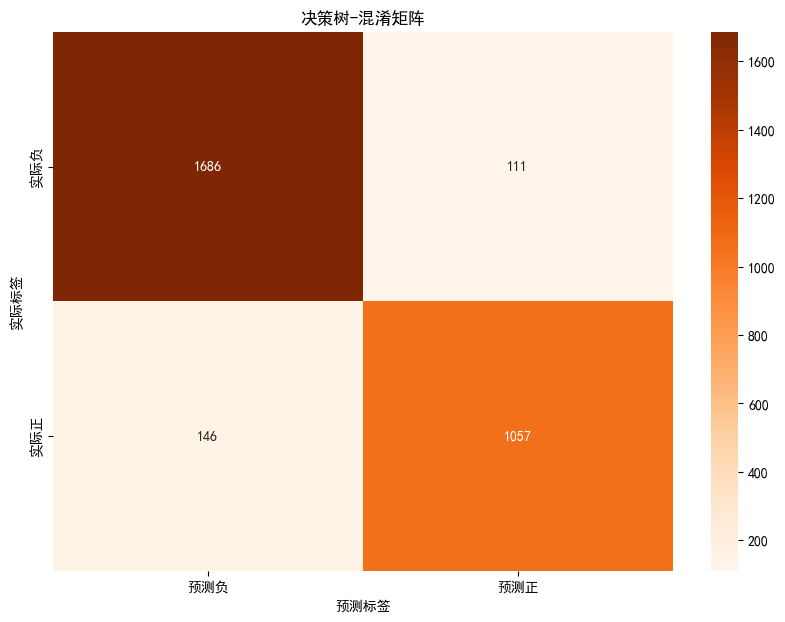

F1 Score: 0.8916


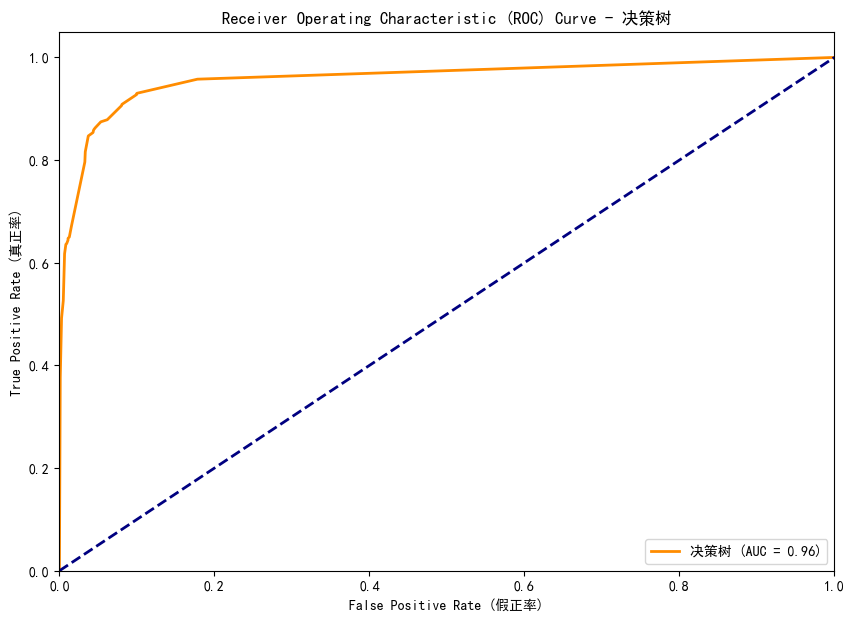

In [10]:
# 导入必要的库
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import time

# 初始化计时
start = time.time()

# 超参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30]
}

# 初始化模型 
tree = DecisionTreeClassifier(random_state=42)  

# 网格搜索最优参数
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit=True
)
grid_search.fit(X_train, y_train) 

# 输出最优参数
print('最优参数是{}'.format(grid_search.best_params_))

# 获取最优模型
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

# 计算训练耗时
train_end = time.time()
train_time = train_end - start
print('分类树训练耗时: {:.4f}秒'.format(train_time))


train_score = best_tree.score(X_train, y_train)
test_score = best_tree.score(X_test, y_test)

# 预测计时
predict_start = time.time()
y_pred = best_tree.predict(X_test)  # 测试集预测结果（类别）
tree_pred_prob = best_tree.predict_proba(X_test)[:, 1]  # 测试集预测概率（正例）
predict_end = time.time()
predict_time = predict_end - predict_start

# 输出准确率和预测耗时
print('训练集准确率: {:.4f}'.format(train_score))
print('测试集准确率: {:.4f}'.format(test_score))
print('预测花费时间: {:.4f}秒'.format(predict_time))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,  # 显示数值
    fmt='d',     # 数值格式为整数
    cmap='Oranges',
    xticklabels=['预测负', '预测正'],
    yticklabels=['实际负', '实际正']
)
plt.xlabel('预测标签')
plt.ylabel('实际标签')
plt.title('决策树-混淆矩阵')  # 修正标题（原标题是KNN，错误）
plt.show()

# 输出F1分数
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred)))


fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_pred_prob)  # 计算假正率/真正率
roc_auc_tree = auc(fpr_tree, tpr_tree)                      # 修正AUC计算逻辑

plt.figure(figsize=(10, 7))
plt.plot(
    fpr_tree, tpr_tree,
    color='darkorange',
    lw=2,
    label='决策树 (AUC = %0.2f)' % roc_auc_tree
)
# 绘制随机猜测基准线（对角线）
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# 坐标轴范围
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# 坐标轴标签和标题
plt.xlabel('False Positive Rate (假正率)')
plt.ylabel('True Positive Rate (真正率)')
plt.title('Receiver Operating Characteristic (ROC) Curve - 决策树')  
plt.legend(loc="lower right")  # 图例位置
plt.show()

In [12]:
#抽取50条进行检验
import random

y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


test_total = len(X_test)
sample_num = 50  # 抽取样本数
# 限制start范围：0 ≤ start ≤ 测试集长度-50，若测试集不足50条，直接取全部
if test_total < sample_num:
    start = 0
    sample_num = test_total
    print(f"测试集仅{test_total}条数据，不足50条，将抽取全部数据测试")
else:
    start = random.randint(0, test_total - sample_num)  # 修正原100-2400的硬编码，适配任意测试集长度

# 抽取50条数据（特征+标签），因已重置索引，切片后样本完全匹配
X_data = X_test[start:start+sample_num]
y_data = y_test[start:start+sample_num]
success_test = 0


for sequence_index in range(len(X_data)):
 
    comment_words = all_words[start + sequence_index]
    # 拼接分词结果输出（处理空评论情况）
    comment_str = '/'.join(comment_words) if comment_words else '【空评论】'
    print(f"评论分词结果：{comment_str}")
    # 模型预测（传入二维数组，适配sklearn要求）
    x_sample = X_data[sequence_index:sequence_index+1]  
    res = best_tree.predict(x_sample)[0]  # 取预测结果的标量值（0/1）

    # 输出预测结果
    if res == 0:             
        print('Predict result : 好评', end='\t')             
    else:              
        print('Predict result : 差评', end='\t')            
    # 输出实际结果（y_data已重置索引，直接用位置索引访问，数值类型）
    y_actual = y_data.iloc[sequence_index]  # 用iloc确保位置访问，兼容Series
    if y_actual == 0:
        print('Actual results: 好评', end='\t')
    else:   
        print('Actual results: 差评', end='\t')
    # 判断预测是否正确
    if res == y_actual:
        print('Predict success!', end='\t')
        success_test += 1
    else:
        print('Predict fail!', end='\t')
    print('\n' + '-'*80 + '\n')  
# 计算并输出预测准确度
accuracy = success_test / sample_num
print(f'本次分类树测试共抽取{sample_num}条数据，预测准确度为: {accuracy:.4f}（{success_test}/{sample_num}）')

评论分词结果：运行/速度/屏幕/效果/亮度/适中/色彩鲜明/散热/性能/散热/外形/外观/外观/大气/轻薄/程度/轻薄/携带/特色/物流/很快
Predict result : 差评	Actual results: 差评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：机器/纠结/久/最终/同事/买/这款/失望/性价比/高/好用/开机/快/运行/灵活/快速/本子/轻巧/学习/办公/外出/旅游/合适
Predict result : 差评	Actual results: 差评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：电脑/舒服/满意/京东/速度/很快/需求/屏幕/效果/护眼/功能/散热/性能/外形/外观/挺薄/好看/颜值/担当/运行/速度/刷屏/快/不卡顿/推荐/推荐
Predict result : 好评	Actual results: 好评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：公司/多年/二手电脑/再也/不想/想着/花钱买/喜欢/半个/月/入手/yoga/系列/不愧/轻薄/楷模/轻巧/超薄/独立/显卡/视频/动画/单独/走/拖拉/显示屏/2.8/高清/瞬间/感觉/感动/终于/跟上/部队/太/完美/习惯/中/亮点/补充/真的/更/早/拥有
Predict result : 好评	Actual results: 好评	Predict success!	
--------------------------------------------------------------------------------

评论分词结果：金厲/外壳/质感/激活/分区/简单/客服/指导/耐心/轻薄/本本/非常适合/学生/党/操作/挺舒服/键盘/挺/顺手/硌/手感/屏幕/尺

In [29]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# 解决中文/负号显示问题（关键，避免图表乱码）
plt.rcParams['font.sans-serif'] = [ 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 设置全局绘图样式（优化颜值，统一风格）
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'f8f9fa'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.4
import mplfinance as mpf
import warnings 
warnings.filterwarnings('ignore')

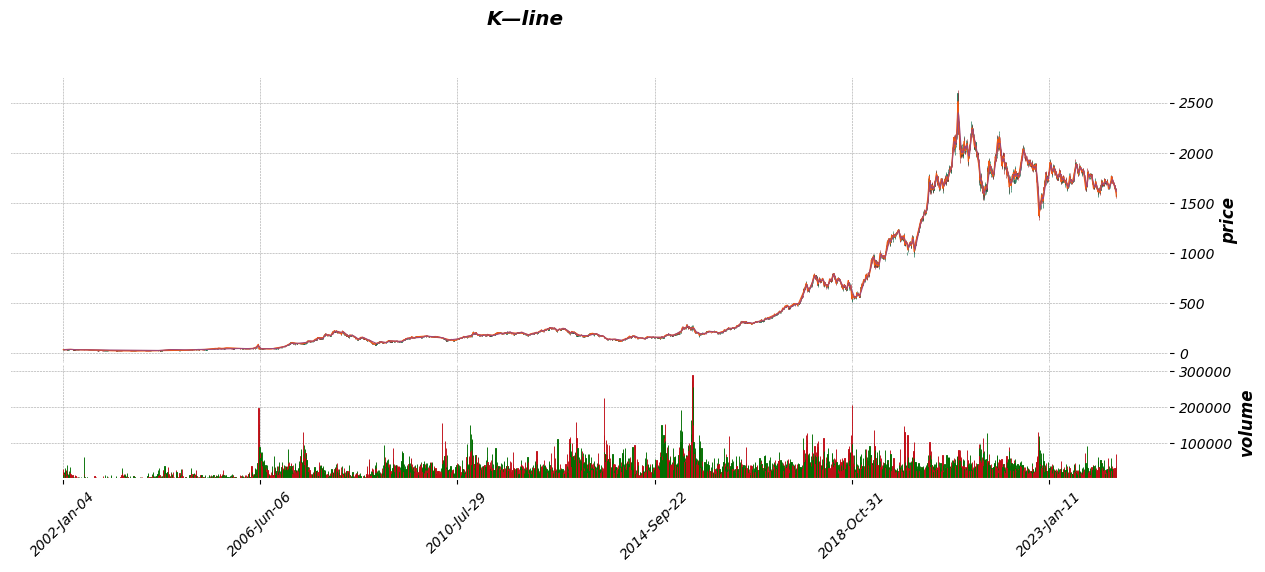

In [14]:
df=pd.read_excel(r'C:\Users\23017\Desktop\Machine Learning\Supervised Learning\data\MaoTai.xlsx')
df.rename(columns={
    'trade_date':'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'vol': 'Volume'  
}, inplace=True)
#转换日期格式
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
#绘制蜡烛图
mpf.plot(df, type='candle', style='charles',
         title='K—line',
         ylabel='price',
         ylabel_lower='volume',
         volume=True,
         figratio=(14,5),
         mav=(3,6,9),
         warn_too_much_data=1000
         
         )  
plt.show()

,Open,Close,Down,Low,High,Volume,Turn,MA5,MA10,RSI,Return
Date,,,,,,,,,,,
2002-01-04,38.72,37.55,-1.00,37.45,38.80,29110,0.0407,NaN,NaN,NaN,NaN
2002-01-07,37.15,37.35,-0.20,36.68,37.50,18943,0.0265,NaN,NaN,NaN,-0.005326
2002-01-08,37.00,36.59,-0.76,36.48,37.59,13287,0.0186,NaN,NaN,NaN,-0.020348
2002-01-09,36.50,36.87,0.28,36.35,37.18,10607,0.0148,NaN,NaN,NaN,0.007652
2002-01-10,36.98,37.24,0.37,36.35,37.39,18816,0.0263,37.120,NaN,NaN,0.010035
2002-01-11,37.01,36.05,-1.19,36.00,37.14,11835,0.0166,36.820,NaN,NaN,-0.031955
2002-01-14,35.70,36.10,0.05,35.43,36.40,18719,0.0262,36.570,NaN,NaN,0.001387
2002-01-15,35.98,36.54,0.44,35.91,37.05,18247,0.0255,36.560,NaN,NaN,0.012188
2002-01-16,36.48,36.35,-0.19,35.40,36.97,13974,0.0195,36.456,NaN,NaN,-0.005200


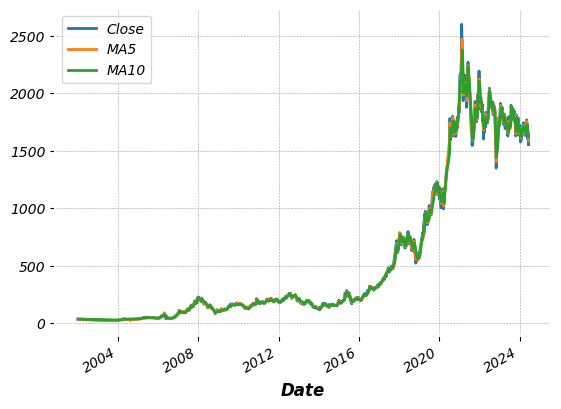

In [15]:
#构造技术指标
df['MA5'] = df['Close'].rolling(5).mean()
df['MA10'] = df['Close'].rolling(10).mean()
#构造RSI：相对强弱指标
df['RSI'] = (df['Close'] - df['Close'].rolling(window=14).min()) / (df['Close'].rolling(window=14).max() - df['Close'].rolling(window=14).min())
#构造回报率
df['Return'] = df['Close'] .pct_change()
df[['Close', 'MA5', 'MA10']].plot()
df.head(10)

In [16]:
#决策树回归
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # 标准化工具
from sklearn.model_selection import GridSearchCV
#目标变量：预测未来5天的收盘价
df['target']=df['Close'].shift(-5)
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Down','Volume', 'Turn','MA5', 'MA10', 'RSI', 'Return']]
y = df['target']
# 时序划分：取最后5个样本为「未来5天真实数据」，前序为训练测试集（禁止随机打乱）
future_5_X = X.iloc[-5:]    # 未来5天特征（真实）
future_5_y_true = y.iloc[-5:]# 未来5天收盘价真实值（用于对比）
X_train_test = X.iloc[:-5]  # 训练+测试集特征
y_train_test = y.iloc[:-5]  # 训练+测试集目标值

# 划分训练集(80%)和测试集(20%)，shuffle=False保证时序连续性
X_train, X_test, y_train, y_test = train_test_split(
    X_train_test, y_train_test, test_size=0.2, random_state=42, shuffle=False
) 
scaler = StandardScaler()
# 仅用训练集拟合scaler，避免数据泄露
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        
future_5_X_scaled = scaler.transform(future_5_X)

In [27]:

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [2, 5, 10, None],  # 保留None（不限制深度），减少过小的深度值
    'min_samples_split': [2, 3, 5],  # 降低最小值，从2开始（原代码是2/5/10/15，可更小）
    'min_samples_leaf': [1, 2, 3],   # 叶节点最小样本数降到1（回归树默认就是1）
    'max_features': [None, 'sqrt'],
    'splitter': ['best']
}
tree_reg = DecisionTreeRegressor(random_state=42)  # random_state保证结果可复现
ts_cv = TimeSeriesSplit(n_splits=5)  

# 网格搜索
grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    cv=ts_cv,  # 时序交叉验证保留
    scoring='neg_mean_absolute_error',  
    n_jobs=-1,  # 并行加速
    verbose=1
)

# 训练网格搜索
start = time.time()
grid_search.fit(X_train_scaled, y_train)
train_time = time.time() - start


# 获取最优回归树模型
best_tree = grid_search.best_estimator_

# 预测
y_test_pred = best_tree.predict(X_test_scaled)    # 测试集预测值
future_5_y_pred = best_tree.predict(future_5_X_scaled)  # 未来5天预测值


Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [30]:
# 测试集评估
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)  # 增加RMSE（更易理解）
r2 = r2_score(y_test, y_test_pred)

# 未来5天评估
future_mse = mean_squared_error(future_5_y_true, future_5_y_pred)
future_rmse = np.sqrt(future_mse)
future_r2 = r2_score(future_5_y_true, future_5_y_pred)

# 输出评估结果
print("="*60)
print(f"【测试集评估】")
print(f"均方误差(MSE): {mse:.4f} | 均方根误差(RMSE): {rmse:.4f} | 决定系数(R²): {r2:.4f}")
print(f"\n【未来5天评估】")
print(f"均方误差(MSE): {future_mse:.4f} | 均方根误差(RMSE): {future_rmse:.4f} | 决定系数(R²): {future_r2:.4f}")

# 输出最优参数
print(f"\n最优超参数: {grid_search.best_params_}")

# 未来5天真实值vs预测值对比
future_compare = pd.DataFrame({
    '未来天数': [f'第{i}天' for i in range(1,6)],
    '真实收盘价': future_5_y_true.values.round(2),
    '预测收盘价': future_5_y_pred.round(2),
    '绝对误差': np.abs(future_5_y_true.values - future_5_y_pred).round(2)
}, index=future_5_X.index)  # 保留原日期索引

print("\n未来5天收盘价预测详细对比：")
print(future_compare)
print("="*60)


【测试集评估】
均方误差(MSE): 406108.0601 | 均方根误差(RMSE): 637.2661 | 决定系数(R²): -5.8446

【未来5天评估】
均方误差(MSE): 217091.1188 | 均方根误差(RMSE): 465.9304 | 决定系数(R²): -202.6865

最优超参数: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}

未来5天收盘价预测详细对比：
           未来天数    真实收盘价    预测收盘价    绝对误差
Date                                     
2024-05-30  第1天  1639.81  1129.80  510.01
2024-05-31  第2天  1619.18  1129.80  489.38
2024-06-03  第3天  1569.00  1129.80  439.20
2024-06-04  第4天  1571.68  1120.16  451.52
2024-06-05  第5天  1555.01  1120.16  434.84


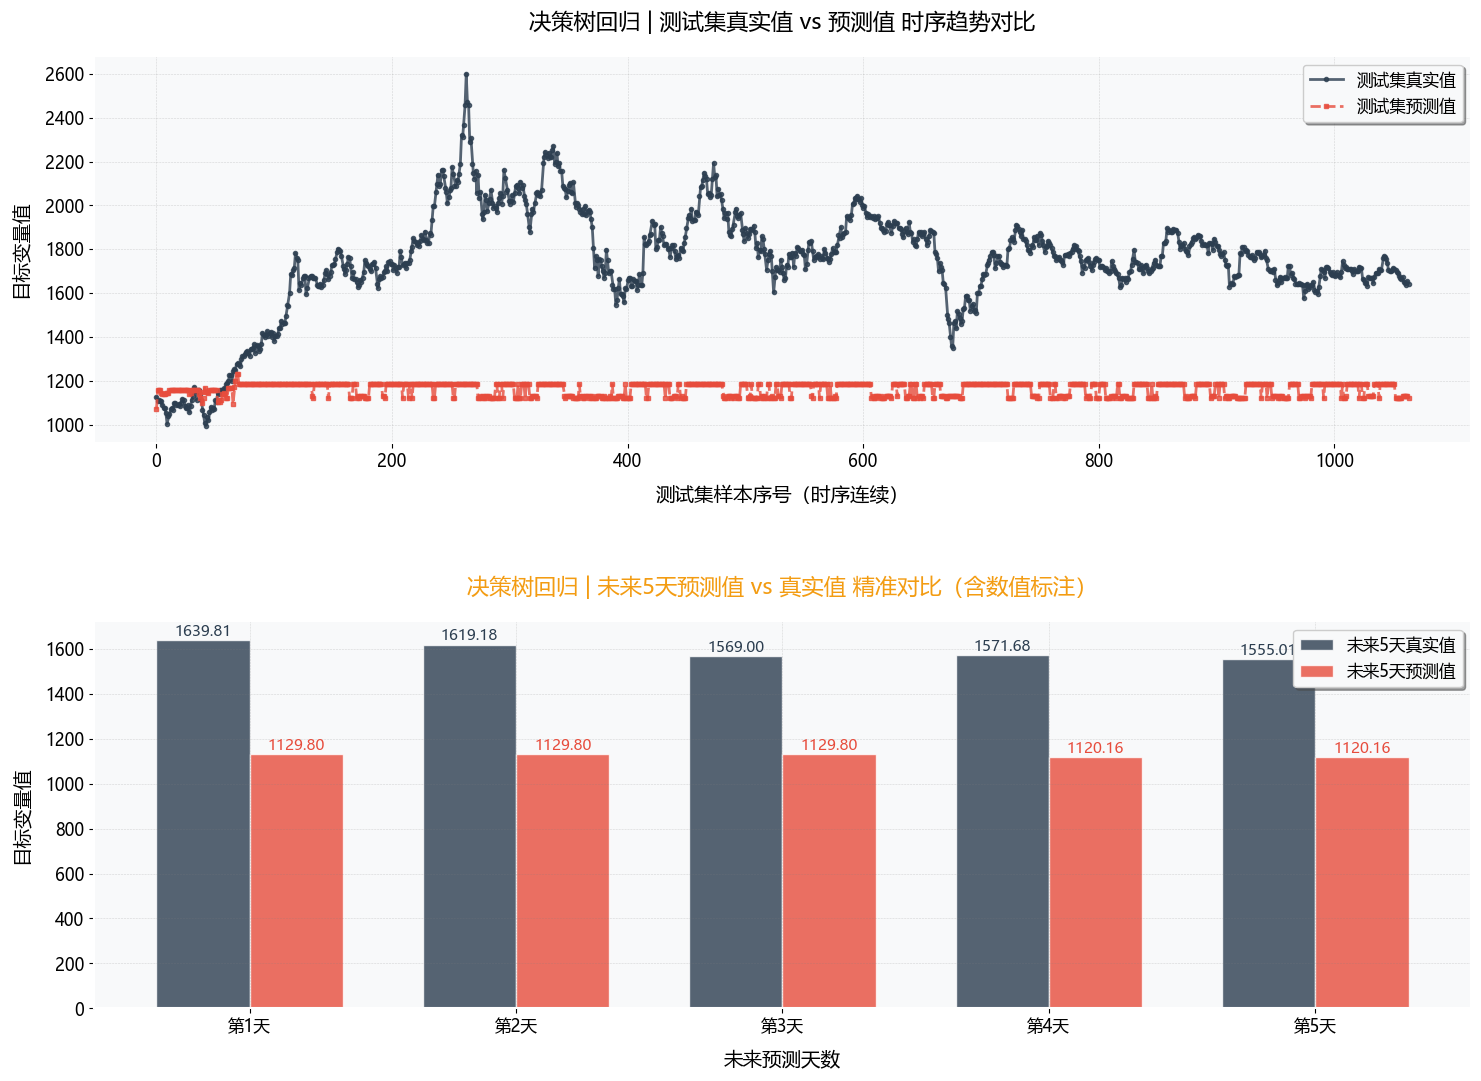


未来5天真实值vs预测值详细对比：
           未来天数      真实值      预测值    绝对误差
Date                                     
2024-05-30  第1天  1639.81  1129.80  510.01
2024-05-31  第2天  1619.18  1129.80  489.38
2024-06-03  第3天  1569.00  1129.80  439.20
2024-06-04  第4天  1571.68  1120.16  451.52
2024-06-05  第5天  1555.01  1120.16  434.84


In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))  
COLOR_TRUE = '#2c3e50'    # 真实值
COLOR_PRED = '#e74c3c'    # 预测值
COLOR_FUTURE = '#f39c12'  # 未来5天
LINE_WIDTH = 2.0
ALPHA = 0.8


x_test = np.arange(len(y_test))
ax1.plot(x_test, y_test, label='测试集真实值', color=COLOR_TRUE, 
         linewidth=LINE_WIDTH, alpha=ALPHA, marker='o', markersize=3)

ax1.plot(x_test, y_test_pred, label='测试集预测值', color=COLOR_PRED, 
         linewidth=LINE_WIDTH, alpha=ALPHA, linestyle='--', marker='s', markersize=3)

ax1.set_title('决策树回归 | 测试集真实值 vs 预测值 时序趋势对比', fontsize=16, pad=20, fontweight='bold')
ax1.set_xlabel('测试集样本序号（时序连续）', fontsize=14, labelpad=10)
ax1.set_ylabel('目标变量值', fontsize=14, labelpad=10)
ax1.legend(loc='best', fontsize=12, frameon=True, shadow=True, fancybox=True)
ax1.grid(True, color='gray', alpha=0.3)
ax1.tick_params(axis='both', labelsize=12)  # 调整刻度字体大小


x_future = np.arange(1, 6)
bar_width = 0.35
ax2.bar(x_future - bar_width/2, future_5_y_true, bar_width, 
         label='未来5天真实值', color=COLOR_TRUE, alpha=ALPHA, edgecolor='white', linewidth=1)
ax2.bar(x_future + bar_width/2, future_5_y_pred, bar_width, 
         label='未来5天预测值', color=COLOR_PRED, alpha=ALPHA, edgecolor='white', linewidth=1)

for i, (true_val, pred_val) in enumerate(zip(future_5_y_true, future_5_y_pred)):
    ax2.text(x_future[i] - bar_width/2, true_val + 1, f'{true_val:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color=COLOR_TRUE)
    ax2.text(x_future[i] + bar_width/2, pred_val + 1, f'{pred_val:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color=COLOR_PRED)

ax2.set_title('决策树回归 | 未来5天预测值 vs 真实值 精准对比（含数值标注）', 
              fontsize=16, pad=20, fontweight='bold', color=COLOR_FUTURE)
ax2.set_xlabel('未来预测天数', fontsize=14, labelpad=10)
ax2.set_ylabel('目标变量值', fontsize=14, labelpad=10)
ax2.set_xticks(x_future)  # 固定x轴刻度为1-5天
ax2.set_xticklabels([f'第{i}天' for i in x_future], fontsize=12)
ax2.legend(loc='best', fontsize=12, frameon=True, shadow=True, fancybox=True)
ax2.grid(True, axis='y', color='gray', alpha=0.3)  # 仅显示y轴网格，更清晰
ax2.tick_params(axis='y', labelsize=12)


plt.tight_layout(pad=5.0)
plt.show()

future_compare = pd.DataFrame({
    '未来天数': [f'第{i}天' for i in range(1,6)],
    '真实值': future_5_y_true.round(2),
    '预测值': future_5_y_pred.round(2),
    '绝对误差': np.abs(future_5_y_true - future_5_y_pred).round(2)
})
print("\n未来5天真实值vs预测值详细对比：")
print(future_compare)